In [ ]:
# @title Get Video
!wget -P video/ "https://ml-hiring.fringecore.sh/capture_the_scene/video.mp4"

--2025-07-04 06:21:36--  https://ml-hiring.fringecore.sh/capture_the_scene/video.mp4
Resolving ml-hiring.fringecore.sh (ml-hiring.fringecore.sh)... 104.21.75.216, 172.67.182.61, 2606:4700:3037::ac43:b63d, ...
Connecting to ml-hiring.fringecore.sh (ml-hiring.fringecore.sh)|104.21.75.216|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3700355 (3.5M) [video/mp4]
Saving to: ‘video/video.mp4’

video.mp4           100%[===================>]   3.53M  --.-KB/s    in 0.04s   

2025-07-04 06:21:37 (92.2 MB/s) - ‘video/video.mp4’ saved [3700355/3700355]



# Function to Implement

In [43]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

def process_video_for_pano(video_path):
    # implement the function to process the video and make a pano shot.
    # display the pano image and return the path to the pano iamge.
    #...
    #your code here
    #...
    cap = cv2.VideoCapture(video_path)
    frames = []
    frame_interval = 10
    path_to_pano= None
    frame_count = 0


    while True:
        success, frame = cap.read()
        if not success:
            break
        if frame_count % frame_interval == 0:
            frames.append(frame)
        frame_count += 1

    cap.release()

    stitcher=cv2.Stitcher_create()
    status, result = stitcher.stitch(frames)

    dst_rgb = cv2.cvtColor(result, cv2.COLOR_BGR2RGB)

    if status ==0:
      fileName = 'stitched_panaroma.jpg'
      plt.figure(figsize=[30,10])
      plt.title("Final Stitched Panaroma")
      plt.imshow(dst_rgb)
      plt.axis('off')
      plt.savefig(fileName)

    path_to_pano = os.path.abspath(fileName)

    return path_to_pano

# Eval

'/content/stitched_panaroma.jpg'

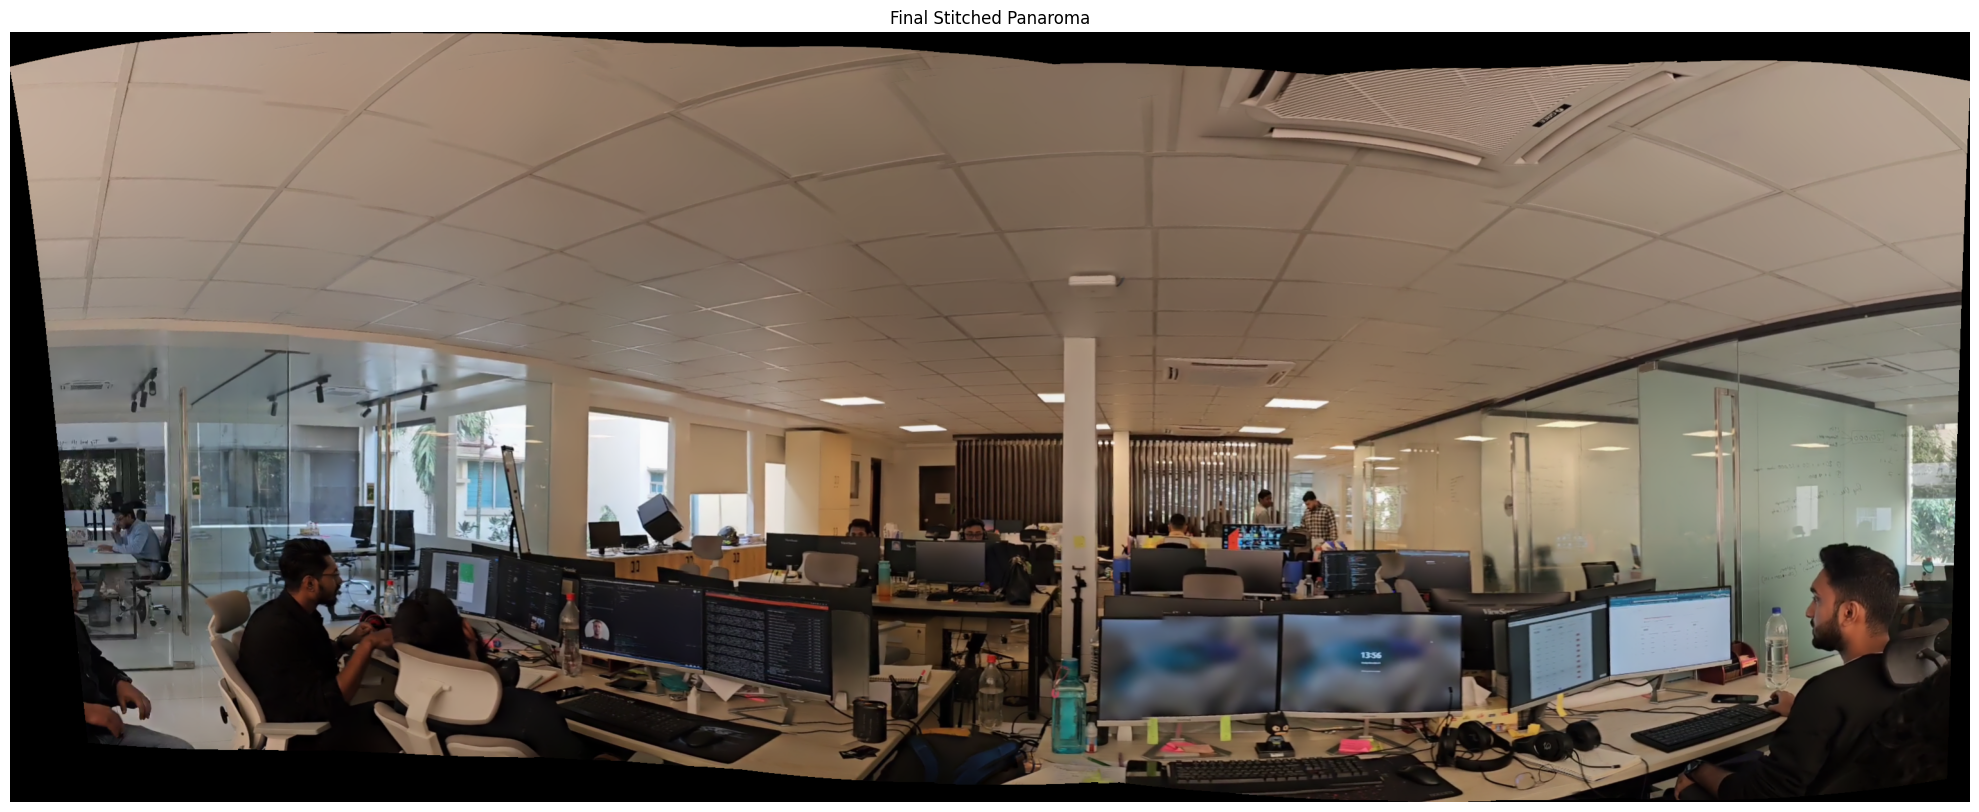

In [44]:
# @title Get Pano

video_file_path = '/content/video/video.mp4'
process_video_for_pano(video_file_path)

# from Images to Panaroma

In [7]:
import cv2
import glob
import matplotlib.pyplot as plt
import math

imagefiles=glob.glob("image/*")

imagefiles.sort()
images=[]

for filename in imagefiles:
  img=cv2.imread(filename)
  img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
  images.append(img)

num_images=len(images)
print(num_images)

3


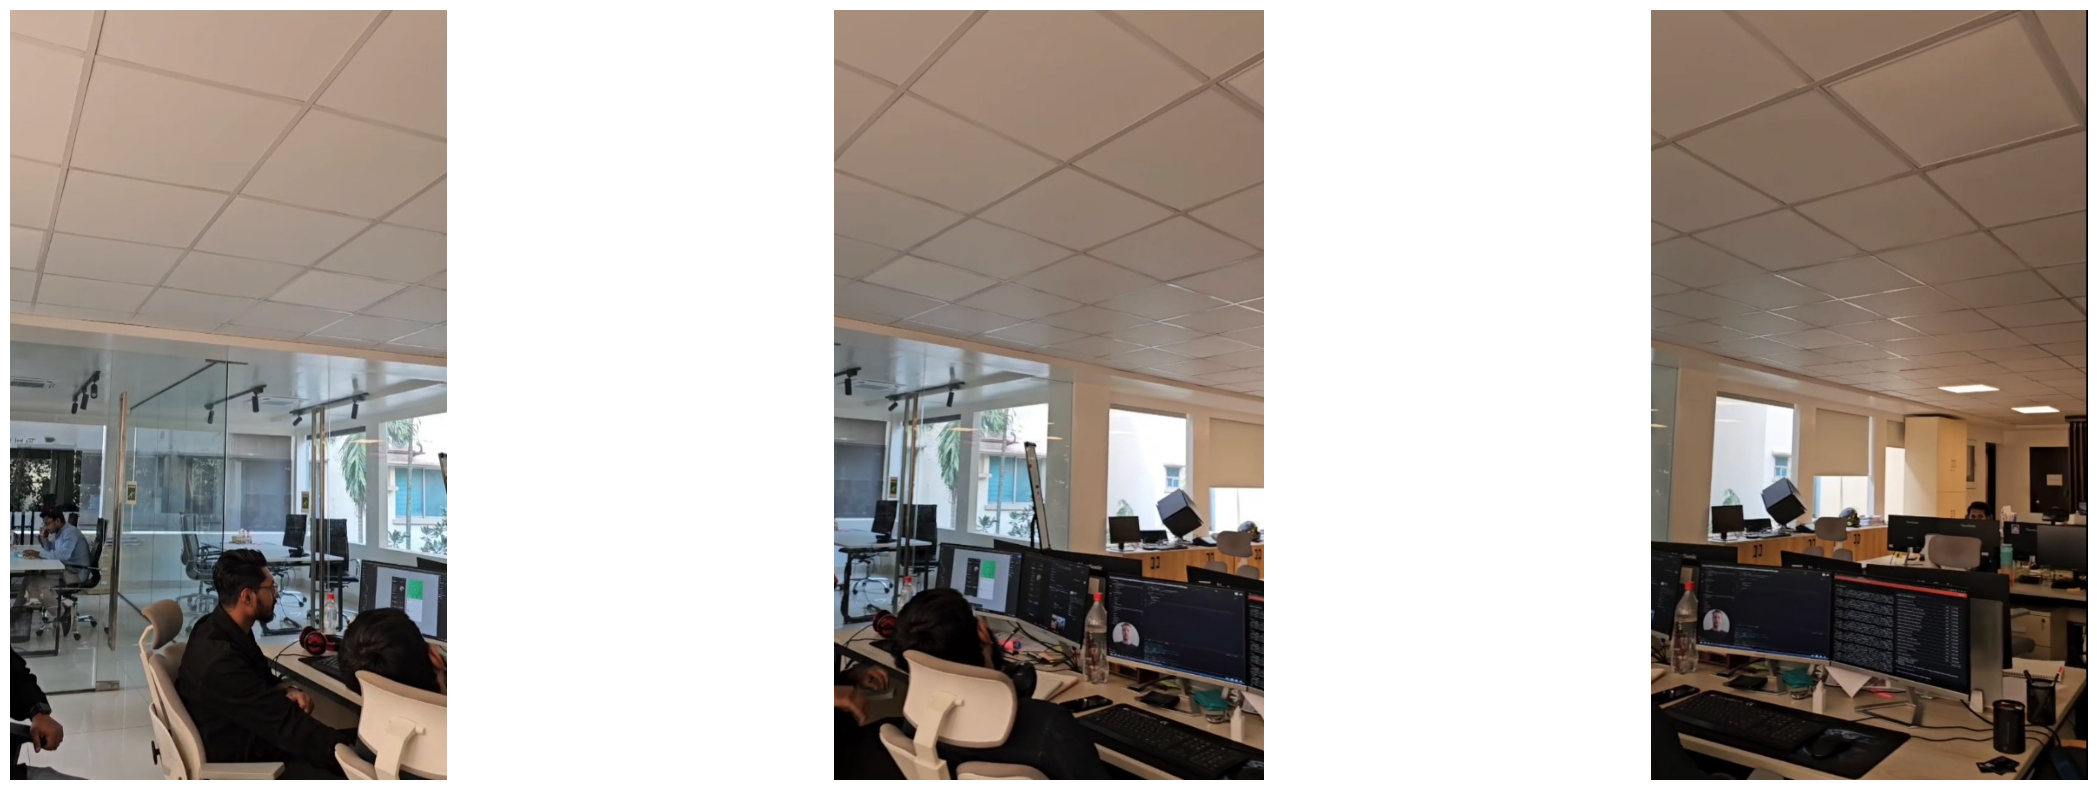

In [8]:
plt.figure(figsize=[30,10])
num_cols=3
num_rows=math.ceil(num_images/num_cols)
for i in range(num_images):
  plt.subplot(num_rows,num_cols,i+1)
  plt.imshow(images[i])
  plt.axis('off')

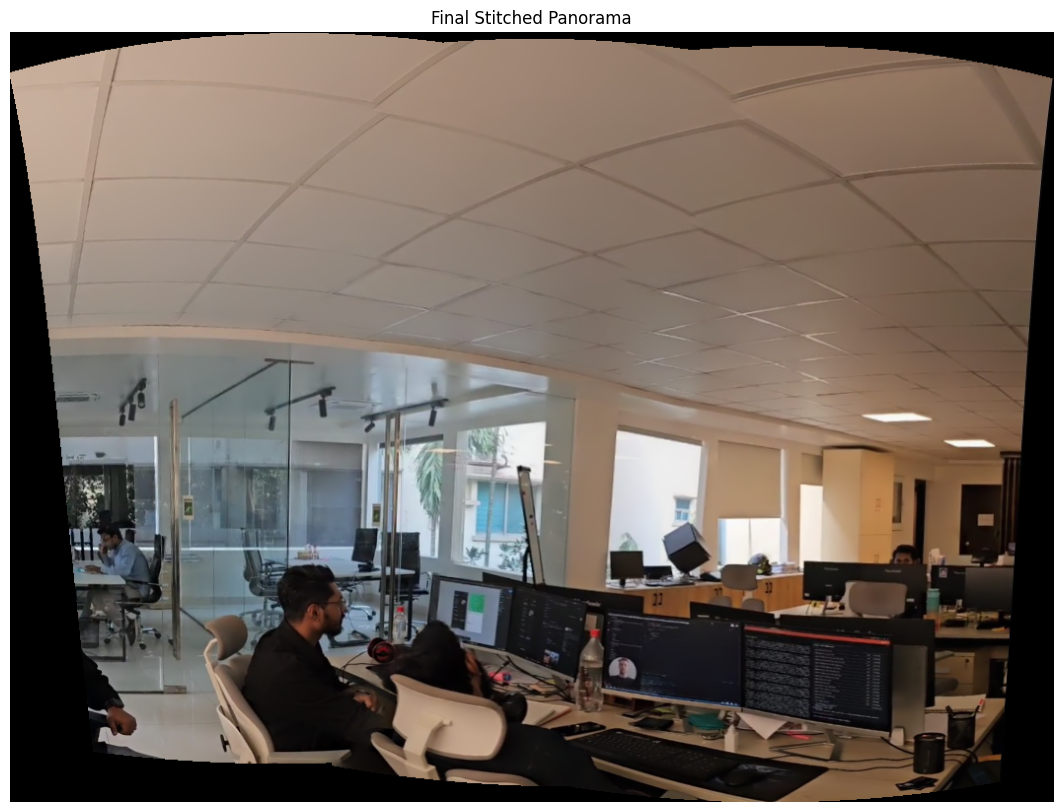

In [16]:
stitcher=cv2.Stitcher_create()
status, result = stitcher.stitch(images)
if status ==0:
  plt.figure(figsize=[30,10])
  plt.title("Final Stitched Panorama")
  plt.imshow(result)
  plt.axis('off')


## Extra

In [12]:
import cv2

# Open the video file
video_path ='/content/video/video.mp4'  # Replace with the actual path to your video
cap = cv2.VideoCapture(video_path)

# Check if the video was opened successfully
if not cap.isOpened():
    print("Error: Could not open video file.")
else:
    # Get the total number of frames
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    print(f"Total number of frames: {total_frames}")

    # Release the video capture object
    cap.release()

Total number of frames: 255
